<a href="https://colab.research.google.com/github/NamLe11/Data-mining/blob/main/B%E1%BA%A3n_sao_c%E1%BB%A7a_phishing_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# thư viện đọc file arff
from scipy.io import arff
file, meta = arff.loadarff(open('/content/sample_data/Training Dataset.arff', 'r'))

# tạo dataframe
import pandas as pd
data = pd.DataFrame(file)
data.tail()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
11050,b'1',b'-1',b'1',b'-1',b'1',b'1',b'1',b'1',b'-1',b'-1',...,b'-1',b'-1',b'1',b'1',b'-1',b'-1',b'1',b'1',b'1',b'1'
11051,b'-1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'-1',b'-1',b'-1',...,b'-1',b'1',b'1',b'1',b'1',b'1',b'1',b'-1',b'1',b'-1'
11052,b'1',b'-1',b'1',b'1',b'1',b'-1',b'1',b'-1',b'-1',b'1',...,b'1',b'1',b'1',b'1',b'1',b'-1',b'1',b'0',b'1',b'-1'
11053,b'-1',b'-1',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'-1',...,b'-1',b'1',b'1',b'1',b'1',b'-1',b'1',b'1',b'1',b'-1'
11054,b'-1',b'-1',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'1',...,b'1',b'1',b'-1',b'1',b'-1',b'-1',b'-1',b'1',b'-1',b'-1'


In [2]:
# kiem tra kieu du lieu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   having_IP_Address            11055 non-null  object
 1   URL_Length                   11055 non-null  object
 2   Shortining_Service           11055 non-null  object
 3   having_At_Symbol             11055 non-null  object
 4   double_slash_redirecting     11055 non-null  object
 5   Prefix_Suffix                11055 non-null  object
 6   having_Sub_Domain            11055 non-null  object
 7   SSLfinal_State               11055 non-null  object
 8   Domain_registeration_length  11055 non-null  object
 9   Favicon                      11055 non-null  object
 10  port                         11055 non-null  object
 11  HTTPS_token                  11055 non-null  object
 12  Request_URL                  11055 non-null  object
 13  URL_of_Anchor                11

In [3]:
# chuyen du lieu sang int
for col in data.columns:
  data[col] = data[col].str.decode('utf-8').astype(int)
data.tail()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1
11054,-1,-1,1,1,1,-1,-1,-1,1,1,...,1,1,-1,1,-1,-1,-1,1,-1,-1


In [4]:
# kiem tra nan
data.isna().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [5]:
# ket qua phan lop
data.Result.value_counts()

 1    6157
-1    4898
Name: Result, dtype: int64

<Axes: >

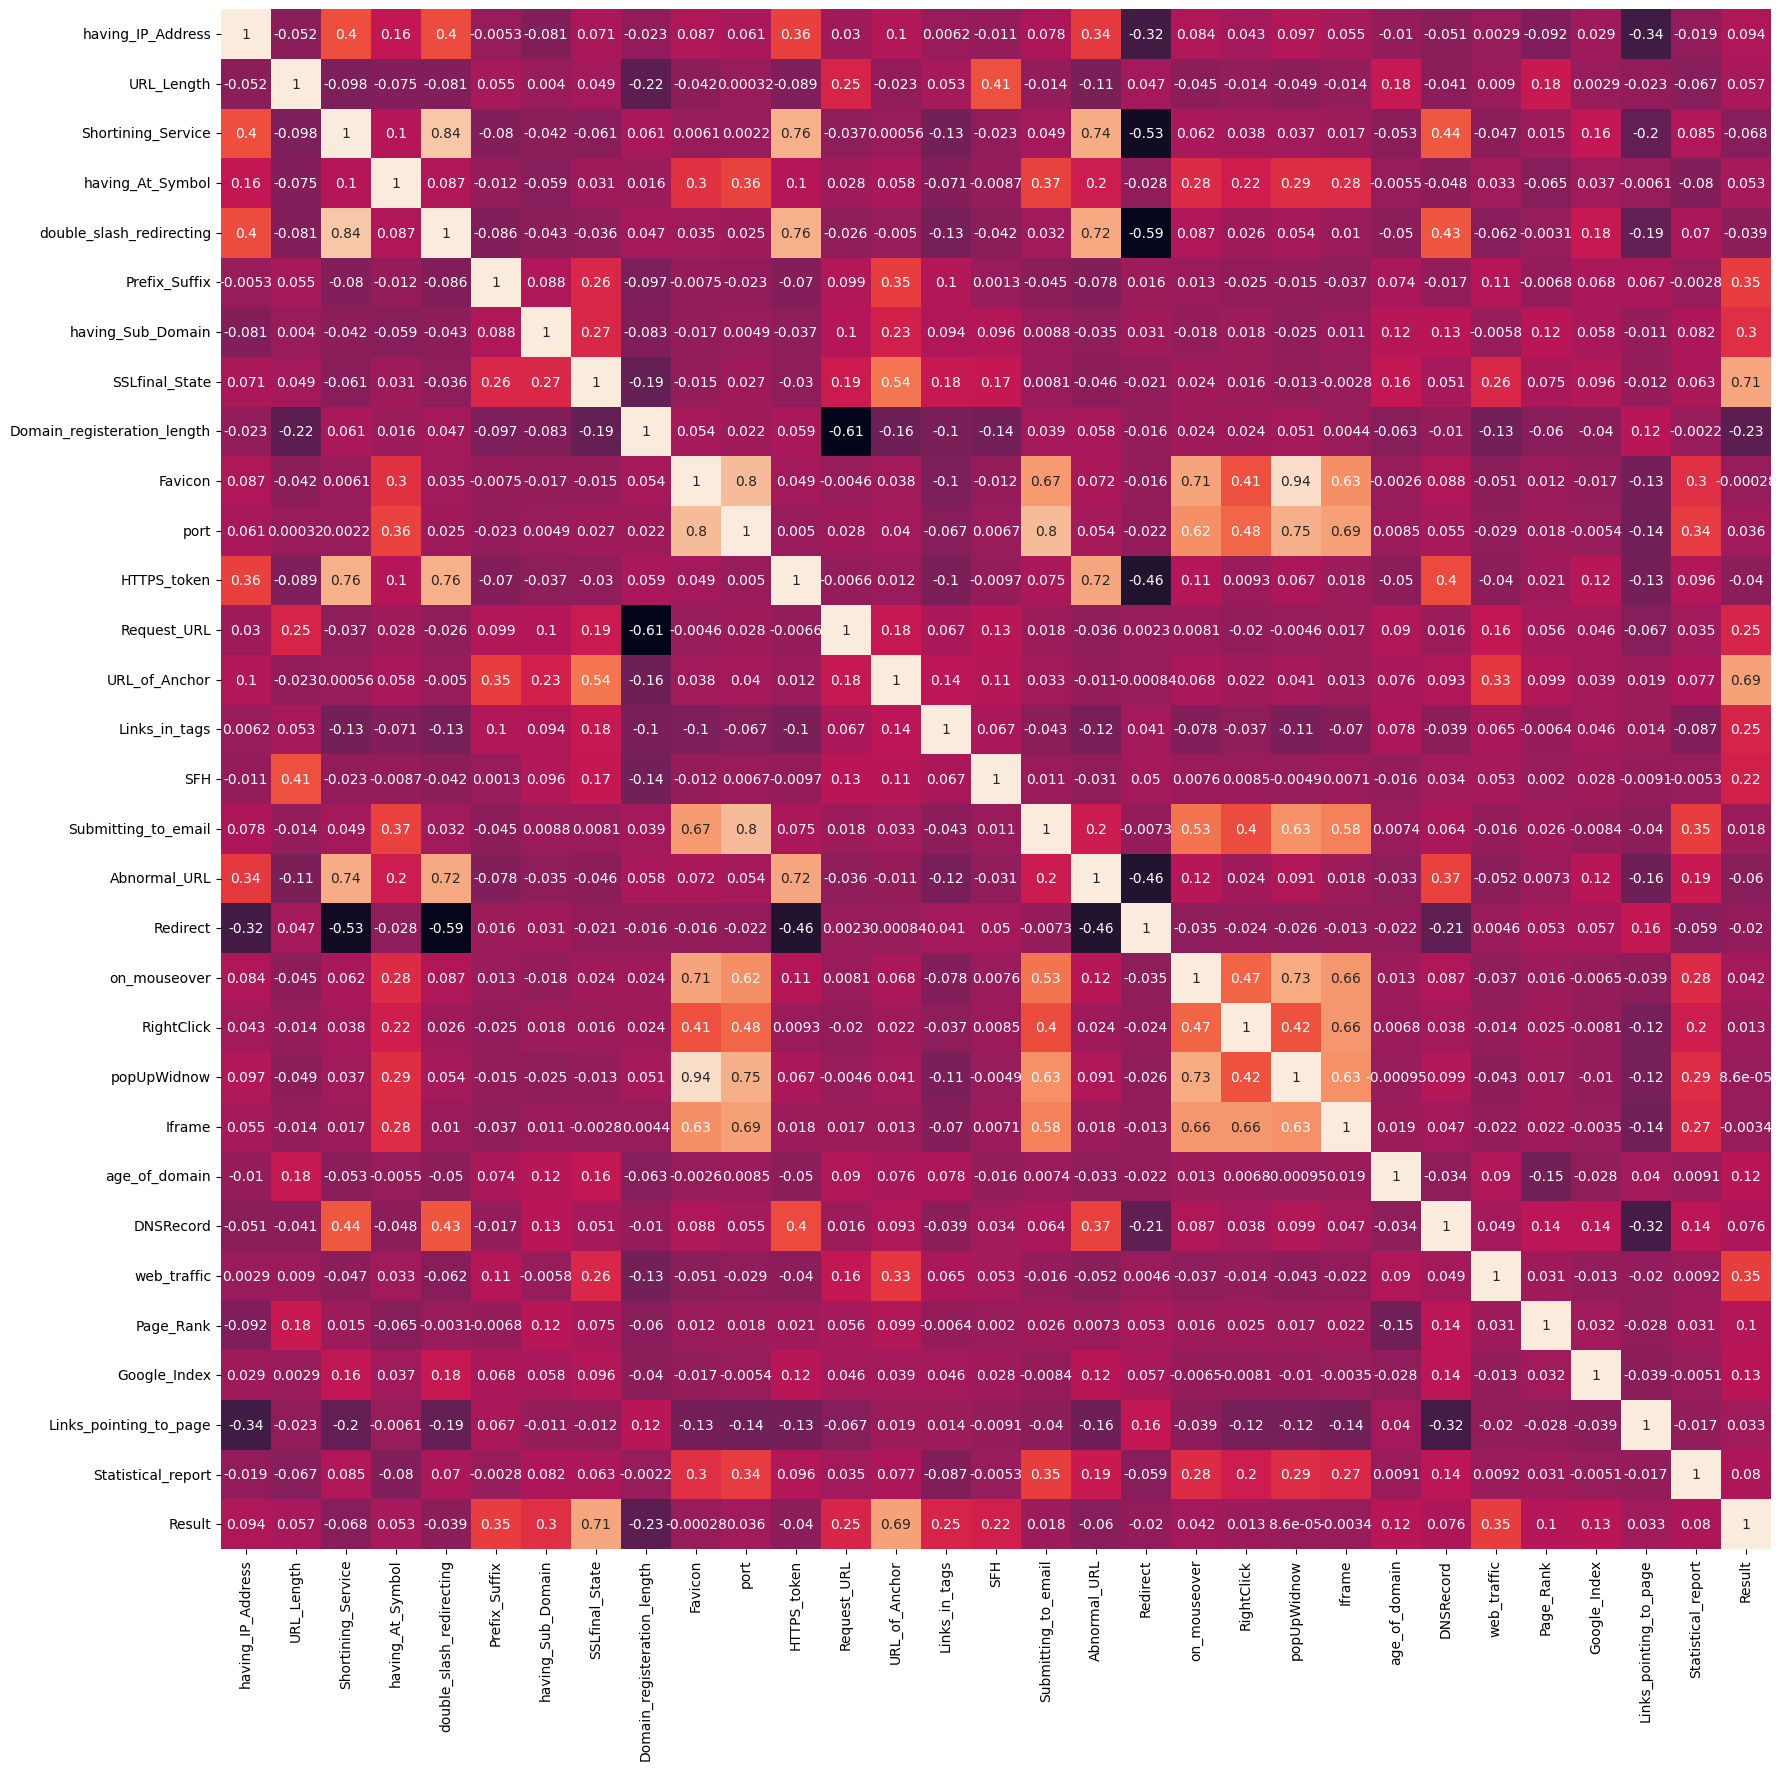

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True, cbar=False)

In [7]:
print(data.corr()['Result'].sort_values())

Domain_registeration_length   -0.225789
Shortining_Service            -0.067966
Abnormal_URL                  -0.060488
HTTPS_token                   -0.039854
double_slash_redirecting      -0.038608
Redirect                      -0.020113
Iframe                        -0.003394
Favicon                       -0.000280
popUpWidnow                    0.000086
RightClick                     0.012653
Submitting_to_email            0.018249
Links_pointing_to_page         0.032574
port                           0.036419
on_mouseover                   0.041838
having_At_Symbol               0.052948
URL_Length                     0.057430
DNSRecord                      0.075718
Statistical_report             0.079857
having_IP_Address              0.094160
Page_Rank                      0.104645
age_of_domain                  0.121496
Google_Index                   0.128950
SFH                            0.221419
Links_in_tags                  0.248229
Request_URL                    0.253372


In [8]:
df = data.copy()
y = data['Result'].values
X = data.drop(['Result'], axis=1)
# import ham train_test_split de chia bo du lieu
from sklearn.model_selection import train_test_split
# huan luyen 70%, kiem tra 30%, cho random_state = None de du lieu huan luyen và du lieu kiem tra sẽ có các giá trị khác nhau mỗi lần chay
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = None)
# import scikit-learn metrics de tinh do chinh xac
from sklearn.metrics import accuracy_score

In [9]:
# import mo hinh support vector machine
from sklearn import svm
svm_score = []
for i in range(5):
    # tao classifier su dung nhan tuyen tinh
    clf = svm.SVC(kernel='linear')
    # huan luyen su dung du lieu training
    clf.fit(X_train, y_train)
    # du doan ket qua su dung du lieu test
    y_pred = clf.predict(X_test)
    # luu do chinh xac de tinh trung binh
    svm_score.append(accuracy_score(y_test, y_pred))
    # xuat ra do chinh xac cua mo hinh
    print("do chinh xac lan {}: {}".format(i+1, svm_score[i]))
# xuat ra trung binh do chinh xac
print("do chinh xac trung binh:", sum(svm_score)/len(svm_score))

do chinh xac lan 1: 0.9176967138981007
do chinh xac lan 2: 0.9176967138981007
do chinh xac lan 3: 0.9176967138981007
do chinh xac lan 4: 0.9176967138981007
do chinh xac lan 5: 0.9176967138981007
do chinh xac trung binh: 0.9176967138981007


In [ ]:
# import mo hinh random forest
from sklearn.ensemble import RandomForestClassifier as rfc
rf_score = []
for i in range(5):
    rf = rfc()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    rf_score.append(accuracy_score(y_test, y_pred))
    # xuat ra do chinh xac cua mo hinh
    print("do chinh xac lan {}: {}".format(i+1, rf_score[i]))
# xuat ra trung binh do chinh xac
print("do chinh xac trung binh:", sum(rf_score)/len(rf_score))

do chinh xac lan 1: 0.9701537533916189
do chinh xac lan 2: 0.9680434127223395
do chinh xac lan 3: 0.9698522761531504
do chinh xac lan 4: 0.9686463671992764
do chinh xac lan 5: 0.9692493216762135
do chinh xac trung binh: 0.9691890262285197


              precision    recall  f1-score   support

          -1       0.94      0.97      0.96      1209
           1       0.98      0.95      0.96      1555

    accuracy                           0.96      2764
   macro avg       0.96      0.96      0.96      2764
weighted avg       0.96      0.96      0.96      2764



Text(113.9222222222222, 0.5, 'predicted label')

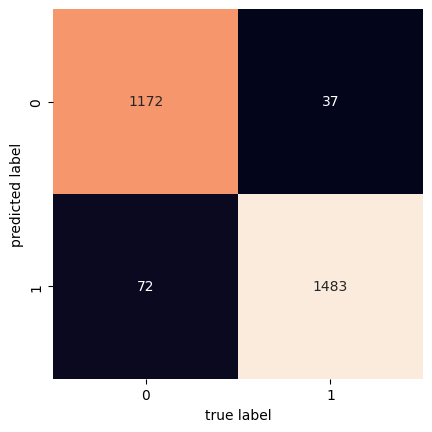

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=None)

model = DecisionTreeClassifier()

model.fit(Xtrain, ytrain)

ypred = model.predict(Xtest)

print(classification_report(ypred, ytest))

mat = confusion_matrix(ytest, ypred)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')